## H(x) = 2*x + 1

In [26]:
import torch
import torch.optim as optim
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

In [39]:
# 데이터셋 생성
n = 30

x1 = torch.arange(0,n)
y1 = 2*x1 + 1

# 난수를 y값에 추가
y1 = y1 + torch.randn(n)*2

# 1차원 데이터를 reshape함수를 사용해서 2차원을 변환
x2 = x1.reshape(-1,1)
y2 = y1.reshape(-1,1)

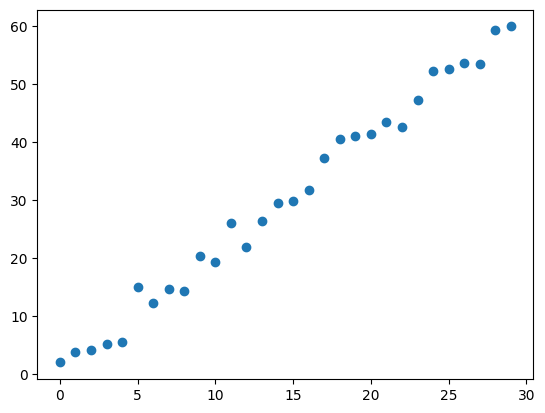

In [40]:
# matplotlib으로 그래프로 데이터 시각화
plt.scatter(x2,y2)
plt.show()

In [55]:
# 하이퍼 파라메터 설정
epochs=2000
learning_rate=0.003

# w = torch.zeros(1, requires_grad=True)
# b = torch.zeros(1, requires_grad=True)

w = torch.tensor([1.98], requires_grad=True)
b = torch.tensor([0.97], requires_grad=True)
w.requires_grad_(True)
b.requires_grad_(True)

# STEP 1. 모델 설정(정의)
# model = x2 * w + b

# STEP 2. 손실함수 정의
loss = nn.MSELoss()

# STEP 3. 최적화 함수 정의
optimizer = optim.SGD([w,b], lr=learning_rate)

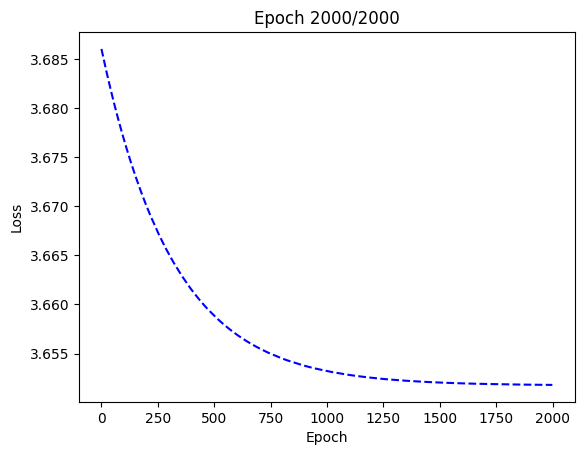

In [57]:
# Colab에서 출력 지우기와 위젯 사용을 위한 모듈 임포트
from IPython.display import clear_output, display
import ipywidgets as widgets
import time

# 모델 학습 + 시각화
epoch_list = []
loss_list  = []

for epoch in range(epochs):
    y_pred = x2 * w + b
    cost = loss(y_pred, y2)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    print("W={}, b={}".format(round(w.item(),6),round(b.item(),6)))
    epoch_list.append(epoch)
    loss_list.append(cost.item())

    clear_output(wait=True)

    if epoch>10:
        plt.figure()
        plt.plot(epoch_list, loss_list, 'b--')

        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title(f'Epoch {epoch+1}/{epochs}')
        plt.show()
    #time.sleep(0.1)

In [ ]:
# 모델 평가